<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/umbcdata602/fall2020/blob/master/lab_mnist_pca.ipynb">
<img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# Lab -- MNIST PCA

PCA of MNIST 8-by-8 digits

Note: scikit-learn `load_digits` is a sub-sampled version (8-by-8) of full-resolution MNIST, which is 28-by-28

### Reference

* Bonaccorso, "Machine Learning Algorithms" 2nd Ed, Chapter 3: [pca.py](https://github.com/giuseppebonaccorso/Machine-Learning-Algorithms-Second-Edition/blob/master/Chapter03/pca.py) -- github

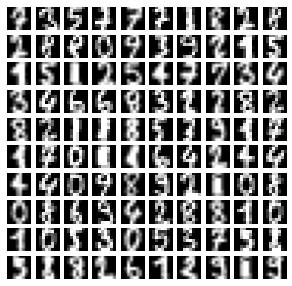

In [1]:
# Bonaccorso's pca.py
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# For reproducibility
np.random.seed(1000)

# Load MNIST digits
digits = load_digits()

# Show some random digits
selection = np.random.randint(0, 1797, size=100)

fig, ax = plt.subplots(10, 10, figsize=(5, 5))

samples = [digits.data[x].reshape((8, 8)) for x in selection]

for i in range(10):
    for j in range(10):
        ax[i, j].set_axis_off()
        ax[i, j].imshow(samples[(i * 8) + j], cmap='gray')

plt.show()

Explained variance ratio
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617 0.00889538 0.00797123 0.00767493 0.00722904
 0.00695889 0.00596081 0.00575615 0.00515158 0.0048954  0.00428887
 0.00373606 0.00353272 0.00336679 0.00328028 0.0030832  0.00293774]


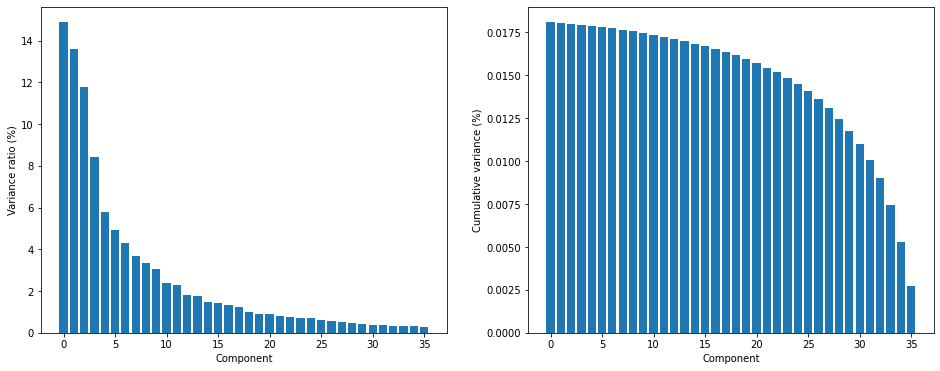

In [2]:
# Perform a PCA on the digits dataset
pca = PCA(n_components=36, whiten=True)
X_pca = pca.fit_transform(digits.data / 255)

print('Explained variance ratio')
print(pca.explained_variance_ratio_)

# Plot the explained variance ratio
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].set_xlabel('Component')
ax[0].set_ylabel('Variance ratio (%)')
ax[0].bar(np.arange(36), pca.explained_variance_ratio_ * 100.0)

ax[1].set_xlabel('Component')
ax[1].set_ylabel('Cumulative variance (%)')
ax[1].bar(np.arange(36), np.cumsum(pca.explained_variance_)[::-1])

plt.show()

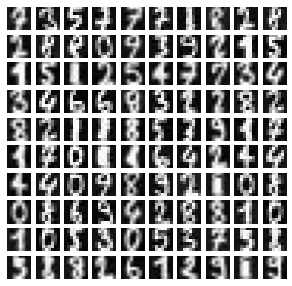

In [3]:
# Rebuild from PCA and show the result
fig, ax = plt.subplots(10, 10, figsize=(5, 5))

samples = [pca.inverse_transform(X_pca[x]).reshape((8, 8)) for x in selection]

for i in range(10):
    for j in range(10):
        ax[i, j].set_axis_off()
        ax[i, j].imshow(samples[(i * 8) + j], cmap='gray')

plt.show()